In [1]:
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install PyWavelets
!pip install pandas
!pip install xraylarch
git clone https://github.com/kaifengZheng/zanes.git

ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


In [2]:
import numpy as np

from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
import plotly.express as px 
import pywt
from scipy.fft import fft, ifft,fftfreq,fftshift
import larch
from wxmplot.interactive import plot
from larch.xafs import autobk
from larch.xafs import cauchy_wavelet
from larch.io import read_ascii,read_athena,merge_groups
from larch.xafs import find_e0,pre_edge,autobk,xftf,xftr
from larch import Group
import glob
import os
import linecache,shutil
from copy import deepcopy
import datetime
import json
import pymatgen
from matplotlib import rc
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from zanes.zanes import data_analysis
from larch import Group

In [4]:
%matplotlib widget

# real wavelet transform on X-ray absorption spectra

In [19]:
def read_iss_Xpress3_multi(element='Cr',pattern='*.dat',roi='roi1',plot='True'):
    filenames=glob.glob(pattern)
    data=[]
    if roi=='roi1':
        for index, scan in enumerate(filenames):
            #scan = scan.resolve()  # Make the path absolute, resolving any symlinks
            #scanname = scan.name
            scan_data=read_ascii(scan)
            #print(scan_data.keys())
            scan_data.mu=-(scan_data.xs_roi01 / scan_data.i0)
            scan_data.label=scan.split('/')[-1].split('.')[0]
            data.append(scan_data)
    if roi=='roi2':
        for index, scan in enumerate(filenames):
            #scan = scan.resolve()  # Make the path absolute, resolving any symlinks
            #scanname = scan.name
            scan_data=read_ascii(scan)
            #print(scan_data.keys())
            scan_data.mu=-(scan_data.xs_roi02 / scan_data.i0)
            scan_data.label=scan.split('/')[-1].split('.')[0]
            data.append(scan_data)
    if roi=='roi3':
        for index, scan in enumerate(filenames):
            #scan = scan.resolve()  # Make the path absolute, resolving any symlinks
            #scanname = scan.name
            scan_data=read_ascii(scan)
            #print(scan_data.keys())
            scan_data.mu=-(scan_data.xs_roi03 / scan_data.i0)
            scan_data.label=scan.split('/')[-1].split('.')[0]
            data.append(scan_data)
    if roi=='roi4':
        for index,scan in enumerate(filenames):
            scan_data=read_ascii(scan)
            scan_data.mu=-(scan_data.xs_roi04/scan_data.i0)
            scan_data.label=scan.split('/')[-1].split('.')[0]
            data.append(scan_data)
    
    if plot=='True':
        plt.figure()
        for d in data:
            plt.plot(d.energy,d.mu,label=d.label)
        plt.legend(frameon=False)
        plt.xlabel('Energy')
        plt.ylabel('mu')
    return data
def read_iss_Xpress3_merge(element='Cr', pattern='*.dat',roi='roi1'):
    data=read_iss_Xpress3_multi(element=element,pattern=pattern,roi=roi,plot='False')
    merged_data = merge_groups(data, master=None, xarray='energy', yarray='mu', kind='cubic', trim=True)
    merged_data.label='merged'
    return merged_data

In [20]:
# file_name=glob.glob("/nsls2/data/iss/legacy/processed/2024/1/312268/*.dat")
# Energy,intensity=read_iss_Xpress3(file_name[-10],'Ni')
# plt.plot(Energy,intensity)


In [21]:
record1=glob.glob("/nsls2/data/iss/legacy/processed/2024/1/312268/*.dat")[-50:-1]
record1

['/nsls2/data/iss/legacy/processed/2024/1/312268/7a_BN_6CoO_air ramp_950C_run1 Co-K 0002.dat',
 '/nsls2/data/iss/legacy/processed/2024/1/312268/7a_BN_6CoO_air ramp_950C_run1 Co-K 0003.dat',
 '/nsls2/data/iss/legacy/processed/2024/1/312268/7a_BN_6CoO_air ramp_950C_run1 Co-K 0004.dat',
 '/nsls2/data/iss/legacy/processed/2024/1/312268/7a_BN_6CoO_air ramp_950C_run1 Co-K 0005.dat',
 '/nsls2/data/iss/legacy/processed/2024/1/312268/7a_BN_6CoO_air ramp_950C_run1 Co-K 0006.dat',
 '/nsls2/data/iss/legacy/processed/2024/1/312268/7a_BN_6CoO_air ramp_950C_run1 Co-K 0007.dat',
 '/nsls2/data/iss/legacy/processed/2024/1/312268/7a_BN_6CoO_air ramp_950C_run1 Co-K 0008.dat',
 '/nsls2/data/iss/legacy/processed/2024/1/312268/7a_BN_6CoO_air ramp_950C_run1 Co-K 0009.dat',
 '/nsls2/data/iss/legacy/processed/2024/1/312268/7a_BN_6CoO_air ramp_950C_run1 Co-K 0010.dat',
 '/nsls2/data/iss/legacy/processed/2024/1/312268/7a_BN_6CoO_air ramp_950C_run1 Co-K 0011.dat',
 '/nsls2/data/iss/legacy/processed/2024/1/312268/7

In [22]:
new_group=read_iss_Xpress3_merge(element='Ni', pattern="/nsls2/data/iss/legacy/processed/2024/1/312268/3a_NaNO3-KNO3_Ni20Cr C2_cooling_run1 (pos 001) Ni-K SDD*.dat",roi='roi2')

E0=8344.4


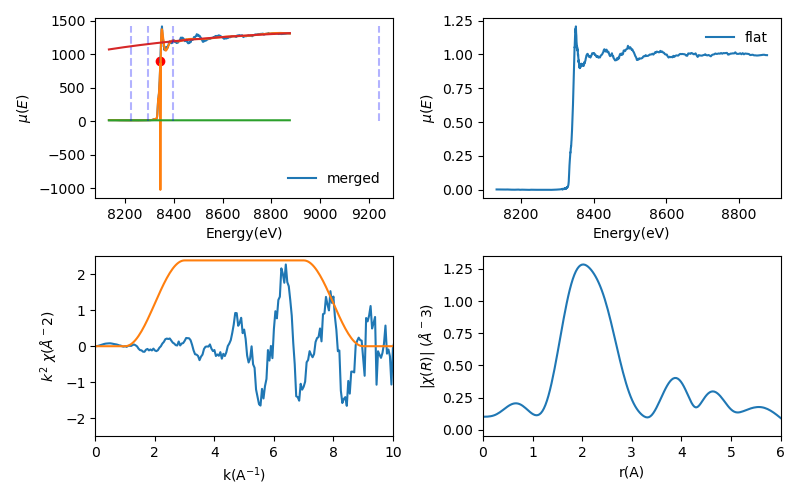

In [23]:
data_analysis.data_processing(new_group,pre_start=-120,pre_end=-50,post_start=50,post_end=900,kweight=2,rbkg=1.5,
                  plot=True,kwin='hanning',krange=[2,8])

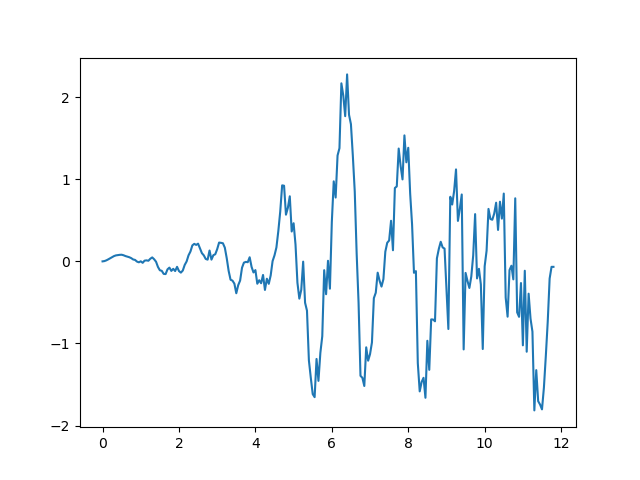

In [24]:
a=Group(k=new_group.k,chi=new_group.chi)
xftf(k=a.k,chi=a.chi,dk=2,kweight=2,group=a,kmin=2,kmax=10,kstep=a.k[2]-a.k[1],window="hanning")  
plt.figure()
plt.plot(a.k,a.chi*a.k*a.k)

In [25]:
import pandas as pd
table={"k":new_group.k,
       "chi":new_group.chi
}
pd.DataFrame(table).to_csv("k_chi.csv",index=None)


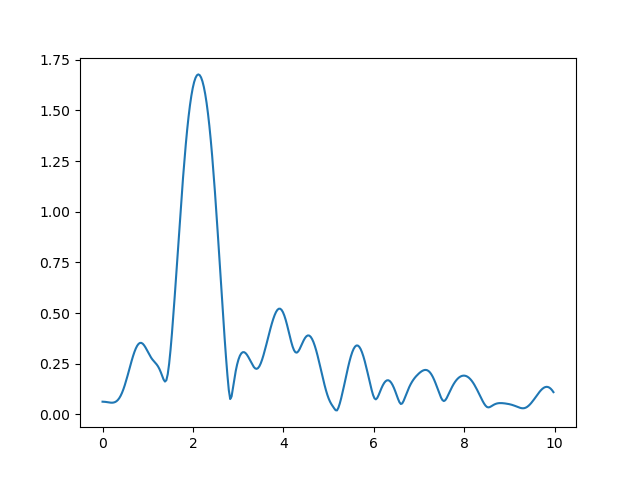

In [26]:
plt.figure()
plt.plot(a.r,a.chir_mag)

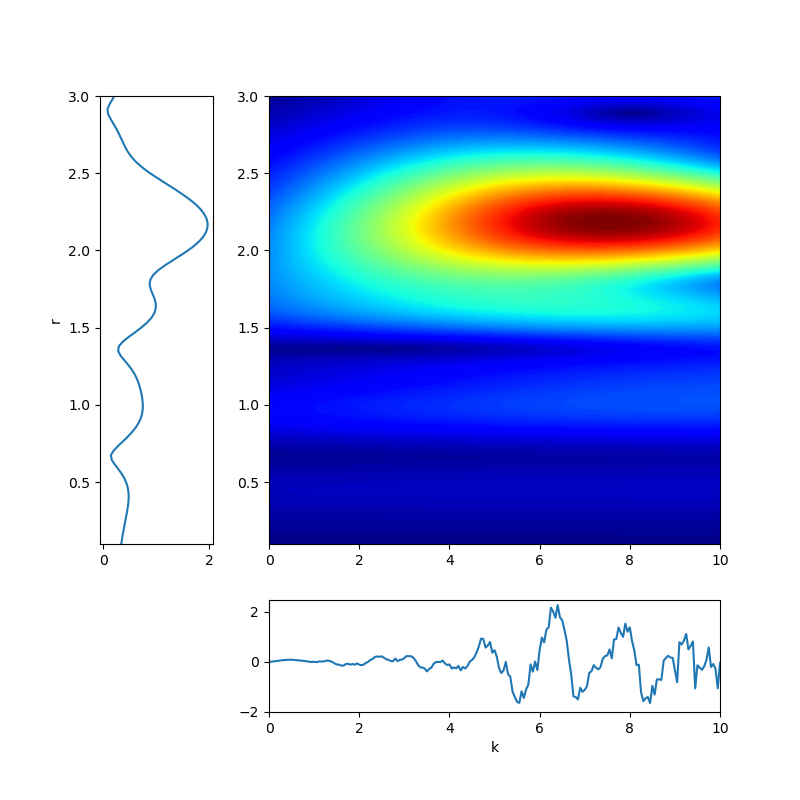

In [27]:
data_analysis.wavelet_transform(new_group,kmin=2,kmax=12,rmin=1,rmax=4,kweight=2,rweight=0,dk=2,dr=0,windows='hanning',original=True)

In [28]:
glob.glob("/nsls2/data/iss/legacy/processed/2024/1/312268/*RAMP.dat")

[]

In [29]:
# plot multiple spectra

In [30]:
new_group=read_iss_Xpress3_merge(element='Cr', pattern="/nsls2/data/iss/legacy/processed/2024/1/312268/3a_NaNO3-KNO3_Ni20Cr C2_HT_run1 (pos 001) Cr-K_SDD*.dat")

[<Group ascii_file /nsls2/data/iss/legacy/processed/2024/1/312268/3a_NaNO3-KNO3_Ni20Cr C2_HT_run1 (pos 001) Cr-K_SDD 0001.dat>,
 <Group ascii_file /nsls2/data/iss/legacy/processed/2024/1/312268/3a_NaNO3-KNO3_Ni20Cr C2_HT_run1 (pos 001) Cr-K_SDD 0002.dat>,
 <Group ascii_file /nsls2/data/iss/legacy/processed/2024/1/312268/3a_NaNO3-KNO3_Ni20Cr C2_HT_run1 (pos 001) Cr-K_SDD 0003.dat>,
 <Group ascii_file /nsls2/data/iss/legacy/processed/2024/1/312268/3a_NaNO3-KNO3_Ni20Cr C2_HT_run1 (pos 001) Cr-K_SDD 0004.dat>,
 <Group ascii_file /nsls2/data/iss/legacy/processed/2024/1/312268/3a_NaNO3-KNO3_Ni20Cr C2_HT_run1 (pos 001) Cr-K_SDD 0005.dat>]

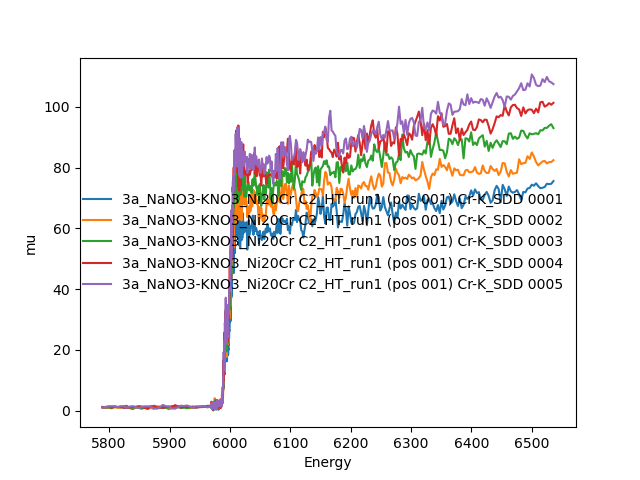

In [31]:
 read_iss_Xpress3_multi(element='Cr',pattern="/nsls2/data/iss/legacy/processed/2024/1/312268/3a_NaNO3-KNO3_Ni20Cr C2_HT_run1 (pos 001) Cr-K_SDD*.dat",plot='True')